In [1]:
#Compare delta of 2004-08 sample and 2004-13 sample 
import pandas as pd 
import os 
import re
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Path where coefficients for eta out K=3, 2004-08 sample is stored
est_path =  os.path.join("Z:/decentralized_choice", "estimates", "in_mag_ind_eta_out_estimates_choice_hetero_K3.csv")

coefs_2008 = pd.read_csv(est_path)



In [2]:
delta_08 = coefs_2008[coefs_2008["names"].str.contains("Mean Utility")]
delta_08 = delta_08.rename(columns={"Unnamed: 0": "j_2008", "omega" : "omega_08"})
xwalk_08_13 = pd.read_csv(os.path.join("Z:/decentralized_choice", "data", "cc_xwalk_08_13.csv"))
xwalk_08_13["j_2008"] = xwalk_08_13["j_2008"].fillna(-99999).astype(int)

In [3]:
coefs_str = """   
  Mean Utility 1: -0.107124
  Mean Utility 2: -0.771622
  Mean Utility 3: -1.595781
  Mean Utility 4: -2.660692
  Mean Utility 5: 1.690504
  Mean Utility 6: 1.486616
  Mean Utility 7: -1.917456
  Mean Utility 8: -0.492502
  Mean Utility 9: -1.514311
  Mean Utility 10: -1.767997
  Mean Utility 11: -2.296449
  Mean Utility 12: -1.560210
  Mean Utility 13: 0.258291
  Mean Utility 14: -0.879140
  Mean Utility 15: -0.621237
  Mean Utility 16: -0.579242
  Mean Utility 17: 1.631960
  Mean Utility 18: -2.492545
  Mean Utility 19: -0.937908
  Mean Utility 20: -1.266477
  Mean Utility 21: 0.219224
  Mean Utility 22: 0.867160
  Mean Utility 23: -1.883331
  Mean Utility 24: -1.005129
  Mean Utility 25: -1.077580
  Mean Utility 26: 0.692423
  Mean Utility 27: -1.658718
  Mean Utility 28: -1.236985
  Mean Utility 29: -1.328745
  Mean Utility 30: -0.019768
  Mean Utility 31: -1.495618
  Mean Utility 32: 0.114854
  Mean Utility 33: -2.291521
  Mean Utility 34: -0.706112
  Mean Utility 35: -2.258884
  Mean Utility 36: -0.968114
  Mean Utility 37: -1.537955
  Mean Utility 38: 2.188638
  Mean Utility 39: -1.273379
  Mean Utility 40: -1.489579
  Mean Utility 41: -0.408015
  Mean Utility 42: 0.062005
  Mean Utility 43: 2.531851
  Mean Utility 44: -1.162201
  Mean Utility 45: -1.610781
  Mean Utility 46: -0.939779
  Mean Utility 47: -0.960459
  Mean Utility 48: -0.530113
  Mean Utility 49: -0.487709
  Mean Utility 50: -1.028685
  Mean Utility 51: -0.344674
  Mean Utility 52: 3.244156
  Mean Utility 53: 4.216763
"""

# Extract pairs of (index, value) using regex
matches = re.findall(r"Mean Utility (\d+):\s*([-+]?\d*\.\d+|\d+)", coefs_str)

# Build DataFrame
delta_13= pd.DataFrame(matches, columns=["j_2013", "omega_13"])

# Convert to numeric type

delta_13["j_2013"] = delta_13["j_2013"].astype(int)
delta_13["omega_13"] = delta_13["omega_13"].astype(float)

In [4]:
delta_13

,j_2013,omega_13
0,1,-0.107124
1,2,-0.771622
2,3,-1.595781
3,4,-2.660692
4,5,1.690504
5,6,1.486616
6,7,-1.917456
7,8,-0.492502
8,9,-1.514311
9,10,-1.767997


In [5]:
df_omega = pd.merge(xwalk_08_13, delta_08[["j_2008", "omega_08"]], how="left", on="j_2008")
df_omega = pd.merge(df_omega, delta_13, how = "left", on = "j_2013")

In [6]:
df_omega

,costcentercode,j_2013,j_2008,mag_name,n_apps,omega_08,omega_13
0,1331101,1,1,WESTSIDE GA MAG,966,-0.941893,-0.107124
1,1350001,2,2,MID-CITY ENR SCI MAG,524,-1.620293,-0.771622
2,1521901,3,-99999,MELROSE STM MAG,34,NaN,-1.595781
3,1643802,4,-99999,RUSSELL GIFTED MAG,38,NaN,-2.660692
4,1713701,5,3,32ND USC PA MAG,4137,0.844590,1.690504
5,1739001,6,4,LAKE BALBOA CP MAG,1343,0.631780,1.486616
6,1802802,7,5,AUDUBON GIFTED MAG,659,-2.892212,-1.917456
7,1803802,8,6,BANCROFT PA MAG,2120,-1.134626,-0.492502
8,1804702,9,7,BELVEDERE MC MAG,615,-2.442546,-1.514311
9,1804703,10,8,BELVEDERE STEAM MAG,490,-2.776391,-1.767997


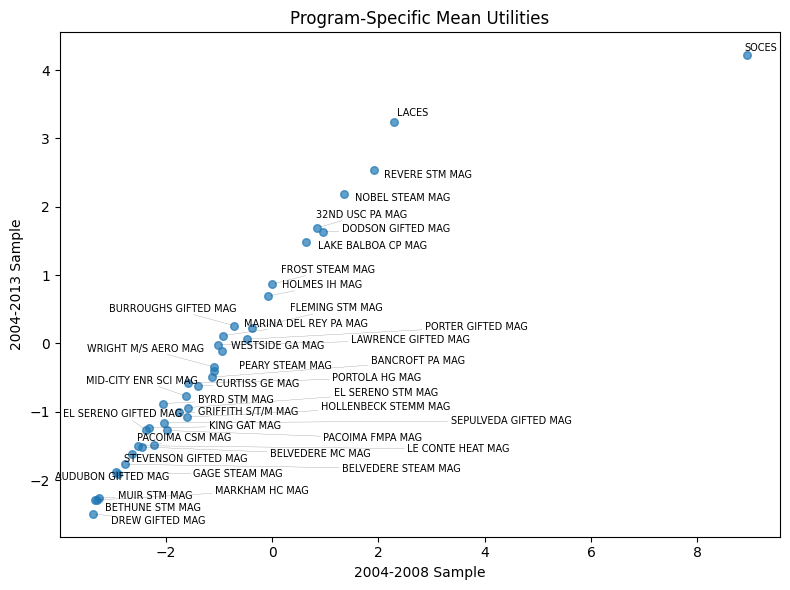

In [7]:

df_filtered = df_omega.dropna(subset=["omega_08", "omega_13"], how="any")

plt.figure(figsize=(8,6))
plt.scatter(df_filtered["omega_08"], df_filtered["omega_13"], s=30, alpha=0.7)
plt.xlabel("2004-2008 Sample"); plt.ylabel("2004-2013 Sample"); plt.title("Program-Specific Mean Utilities")

texts = []
for _, row in df_filtered.iterrows():
    texts.append(plt.text(row["omega_08"], row["omega_13"], row["mag_name"], fontsize=7))

adjust_text(texts, arrowprops=dict(arrowstyle="-", lw=0.2, alpha=0.5))

plt.tight_layout()
plt.savefig("Z:/decentralized_choice/code/2_structural_estimation/logs/delta_08_vs_13.png")
plt.show()


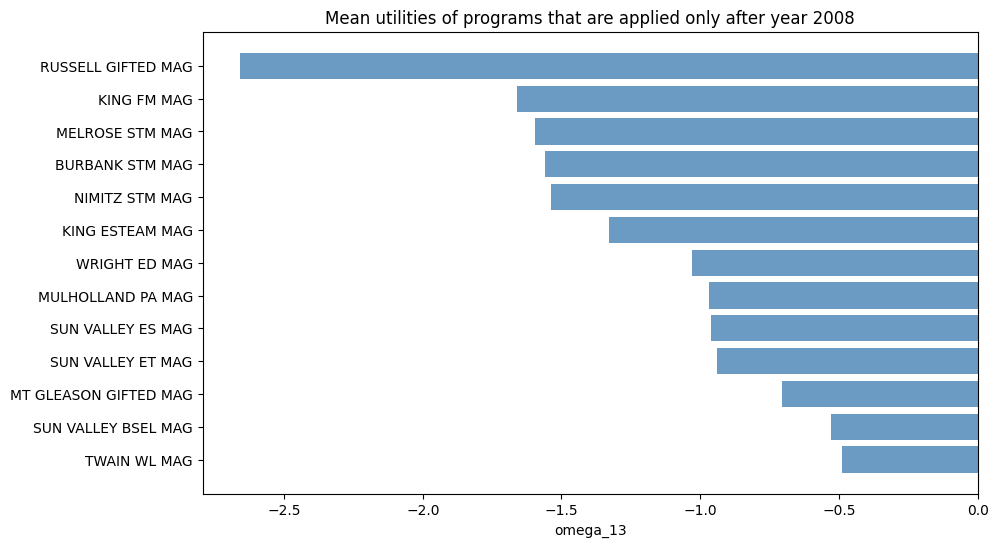

In [14]:
# Filter first
df_missing_08 = df_omega[df_omega["omega_08"].isna() & df_omega["omega_13"].notna()]

# Sort by omega_13
df_missing_08 = df_missing_08.sort_values("omega_13", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df_missing_08["mag_name"], df_missing_08["omega_13"], color="steelblue", alpha=0.8)
plt.xlabel("omega_13")
plt.title("Mean utilities of programs that are applied only after year 2008")
plt.savefig("Z:/decentralized_choice/code/2_structural_estimation/logs/delta_13.png", bbox_inches='tight')

# plt.tight_layout()
plt.show()
